In [1]:
# import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("./6dB/df_6dB_pump_fe_ta_imb.csv")
# data = pd.read_csv('df_6dBfan_id06.csv')
#clean data
Target = data['target']
# indexs = data['Unnamed: 0']

data.drop(['target', 'Unnamed: 0'], axis=1, inplace=True)
# data.drop(['target'], axis=1, inplace=True)
data = data.drop(data.iloc[:,13:], axis=1)
data


,mfccs0,mfccs1,mfccs2,mfccs3,mfccs4,mfccs5,mfccs6,mfccs7,mfccs8,mfccs9,mfccs10,mfccs11,mfccs12
0,-405.86188,152.76860,-74.529500,62.734150,-44.739450,47.361115,-23.117369,27.913315,-14.657843,5.387503,-1.358829,-3.800514,10.668890
1,-405.69257,151.58089,-74.303100,61.144775,-43.903812,44.871080,-22.432236,26.454416,-13.038487,8.177551,-0.561013,-6.047754,9.784236
2,-398.59280,145.81995,-81.038690,56.707012,-49.122260,36.722343,-30.608640,22.128532,-14.495670,5.461157,-2.164203,-7.009260,7.983214
3,-404.55270,152.83186,-72.842790,66.303690,-42.953503,45.730520,-26.300179,27.969782,-13.734242,6.439921,-1.166000,-4.973391,10.346660
4,-409.14900,151.14287,-76.308340,59.437164,-50.093975,40.913765,-27.727530,26.517015,-15.732157,4.814447,-4.608692,-6.492398,10.583862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4200,-485.06808,194.17859,-29.763617,29.640156,-43.863480,31.044250,-19.599741,9.814097,-16.224726,10.349491,8.316769,-4.086709,7.644895
4201,-479.76540,199.62973,-41.633297,29.604536,-47.226242,38.342743,-26.486916,17.328615,-15.538331,5.610619,3.113407,0.252341,9.828274
4202,-490.56073,215.63403,-47.646626,38.303690,-31.487036,27.978544,-13.531141,7.744689,-10.530635,2.388860,5.858380,-6.970968,3.115183
4203,-488.47357,214.24652,-49.087486,39.699284,-33.354244,31.067263,-14.689156,8.109730,-11.188374,3.281071,6.438846,-5.898676,5.378303


In [2]:
# Extract principal components (main dimensions of variation) using PCA, 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)
data_pca = pca.transform(data)
data = pd.DataFrame(data_pca)
data


# #EDA
# df1=df.iloc[:,0:4]
# sns.pairplot(df1)

# fig=plt.figure(figsize=(10,10))
# plt.scatter(df['mfccs0'], df['mfccs2'], s=2)
# plt.title(" Mffcs metrics")
# plt.xlabel("mfccs 0")
# plt.ylabel("mfccs 2")

,0,1
0,-39.586308,9.218040
1,-39.001037,11.040225
2,-48.820105,14.879462
3,-40.614342,8.546459
4,-38.291247,8.575888
...,...,...
4200,64.135851,5.123090
4201,54.957872,2.696596
4202,73.662198,6.167290
4203,69.487213,4.283854


Text(0, 0.5, 'Inertia')

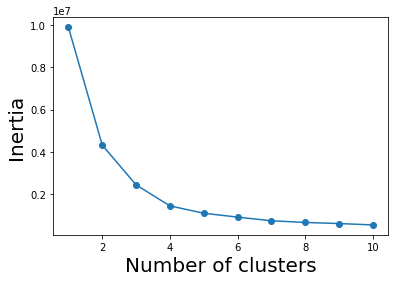

In [3]:
# calculate distortion for a range of number of cluster

from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

inertia = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Inertia', fontsize = 20)
# plt.show()
# plt.savefig('elbow.png')
# visualizer = KElbowVisualizer(km, k=(2,10))
 
# visualizer.fit(data)        # Fit the data to the visualizer
# visualizer.show()        # Finalize and render the figure



In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# number of Pokémon clusters
team_size = 3


data_normalized=(data-data.mean())/data.std()
data_normalized = data_normalized.add_suffix('_zscore')

# fit a kmeans object to the dataset
kmeans1 = KMeans(n_clusters=team_size, init='k-means++').fit(data_normalized)

# kmeans = SpectralClustering(n_clusters=4,
#         assign_labels='discretize',
#         random_state=0).fit(data_normalized)

model = kmeans1

# clusters is an attribute of the object
cluster_centers = model.cluster_centers_

# add cluster index to dataframe
Index = range(data_normalized.shape[0])
# data_normalized['Index'] = Index
data_normalized['Target'] = Target

cluster_labels = pd.Series(model.labels_, name='cluster')
data_normalized = data_normalized.join(cluster_labels.to_frame())

# datax = data_normalized.join(cluster_labels.to_frame()).join(indexs.to_frame())
data_normalized


# g = sns.FacetGrid(data_normalized, col="cluster", height=5, aspect=1)


# g.map(sns.scatterplot, "0_zscore", "1_zscore", alpha=.7)
# g.add_legend()

,0_zscore,1_zscore,Target,cluster
0,-0.889750,0.473919,1,1
1,-0.876596,0.567602,1,1
2,-1.097291,0.764985,1,1
3,-0.912857,0.439392,1,1
4,-0.860642,0.440905,1,1
...,...,...,...,...
4200,1.441531,0.263389,0,0
4201,1.235245,0.138638,0,0
4202,1.655647,0.317074,0,0
4203,1.561809,0.220242,0,0


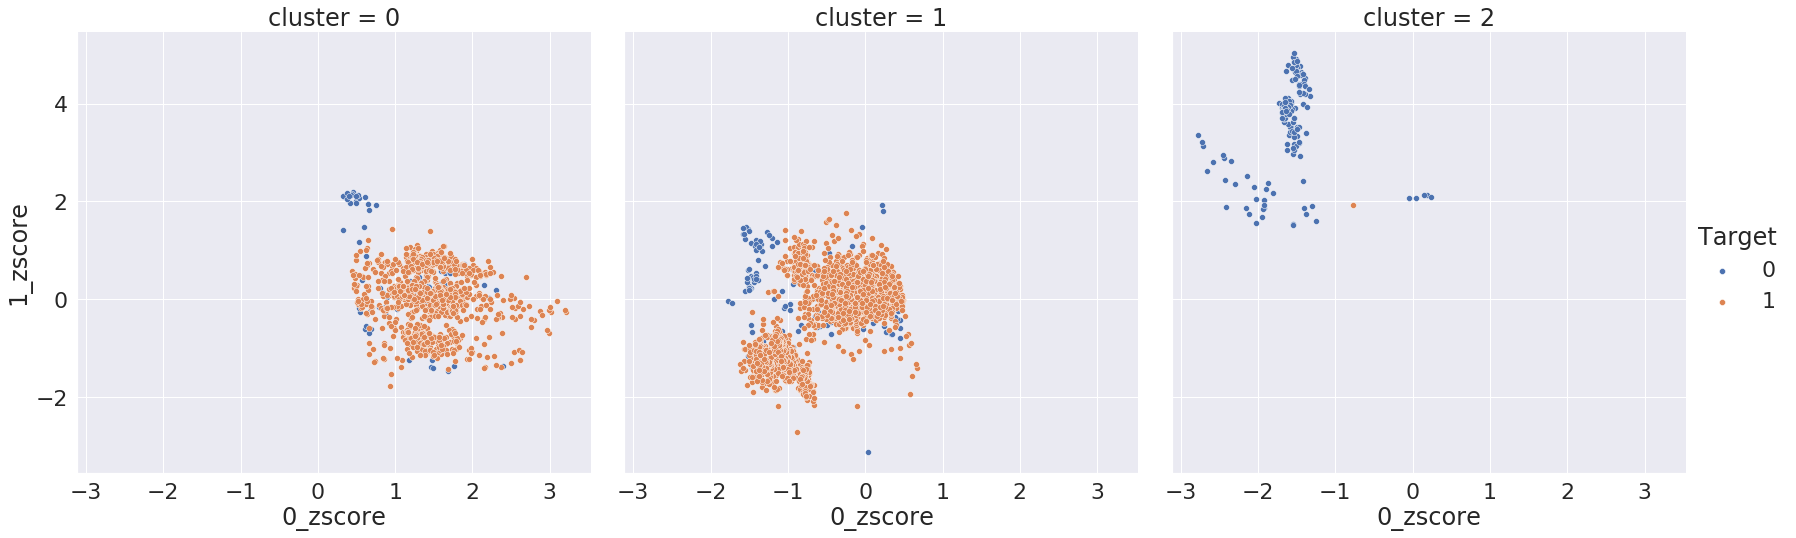

In [15]:
g = sns.FacetGrid(data_normalized, col="cluster", hue='Target', height=8, aspect=1)

g.map(sns.scatterplot, "0_zscore", "1_zscore")
g.add_legend()
sns.set(font_scale=2)
g.savefig('pump_pics/scatterplot_pump_6dB_3_2f.png')


In [6]:
# plt.savefig('scatterplot_slider_6dB_3_2f.png')
# sns.lmplot(x='Unnamed: 0', y='mfccs5',  height=10, data=data,
#            fit_reg=False, hue='cluster')
# plt.clf()
# for i in list(data_normalized):
    # sns.lmplot(x='Index', y=f'mfccs{i}_zscore',  height=10, data=data_normalized,
    # sns.lmplot(x='Index', y=f'{i}',  height=10, data=data_normalized,
# sns.lmplot(x='mfccs1_zscore', y='mfccs5_zscore',  height=10, data=data_normalized,
#            fit_reg=False, hue='cluster')
    # sns.lmplot(x='0_zscore', y='1_zscore',  height=10, data=data_normalized,
    #            fit_reg=False, hue='cluster')
    # sns.lmplot(x='0_zscore', y='1_zscore',  height=10, data=data_normalized,
    #            fit_reg=False, hue='Target')

,cluster,Target,Percentage
0,0,1,92.080153
1,0,0,7.919847
2,1,1,92.643142
3,1,0,7.356858
4,2,0,99.346405
5,2,1,0.653595


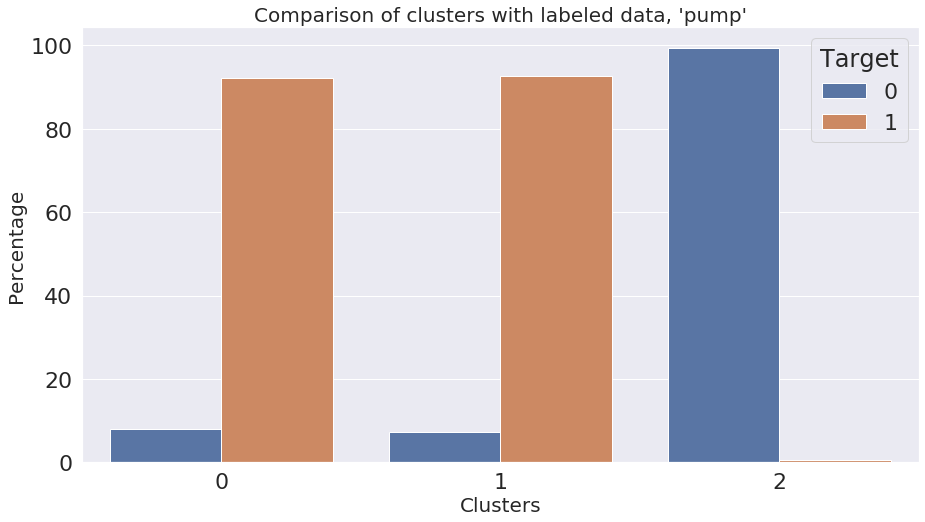

In [16]:
cluster_counts = (data_normalized.groupby(['cluster'])['Target']
                     .value_counts(normalize=True)
                     .rename('Percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('cluster'))
cluster_counts

p = sns.barplot(x="cluster", y="Percentage", hue="Target", data=cluster_counts)
plt.gcf().set_size_inches(15, 8)
p.set_xlabel("Clusters", fontsize = 20)
p.set_ylabel("Percentage", fontsize = 20)
p.set_title("Comparison of clusters with labeled data, 'pump'", fontsize = 20)
plt.savefig('pump_pics/barplot_pump_6dB_3_2f.png')
cluster_counts

In [8]:
# for i in list(data_normalized):
#     sns.lmplot(x='0_zscore', y=f'{i}',  height=10, data=data_normalized,
#                fit_reg=False, hue='Target')

In [9]:
Index = range(data_normalized.shape[0])
data_normalized['Index'] = Index
data_normalized

# Now separate the data
# A = Z[cluster_labels.ravel()==0]
# B = Z[cluster_labels.ravel()==1]
# B = Z[cluster_labels.ravel()==2]
# A['Unnamed: 0'].shape 
# fig=plt.figure(figsize=(10,10))
# plt.plot(A['Unnamed: 0'])#, df['mfccs2'], s=2)



# sns.lmplot(x='Unnamed: 0', y='mfccs1_zscore',  height=10, data=A,
#            fit_reg=False, hue='cluster')

# # Plot the data
# plt.scatter(A[:,0],A[:,1])
# plt.scatter(B[:,0],B[:,1],c = 'r')
# plt.scatter(cluster_center[:,0],cluster_center[:,1],s = 80,c = 'y', marker = 's')
# plt.xlabel('Test Data'),plt.ylabel('Z samples')
# plt.show()

,0_zscore,1_zscore,Target,cluster,Index
0,-0.889750,0.473919,1,0,0
1,-0.876596,0.567602,1,0,1
2,-1.097291,0.764985,1,0,2
3,-0.912857,0.439392,1,0,3
4,-0.860642,0.440905,1,0,4
...,...,...,...,...,...
4200,1.441531,0.263389,0,2,4200
4201,1.235245,0.138638,0,2,4201
4202,1.655647,0.317074,0,2,4202
4203,1.561809,0.220242,0,2,4203
